In [2]:
# Standard libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Planetary libraries
from heat1d import prettyPlots
from heat1d import planets
import heat1d

prettyPlots.setStyle()

In [3]:
# Latitude
lat = 0.0

# Planet
p = planets.Ganymede

# Create model
m = heat1d.model(p, lat*np.pi/180.0, 5)

# Run model
m.run()

Text(0, 0.5, 'Temperature, $T$ (K)')

<Figure size 432x288 with 0 Axes>

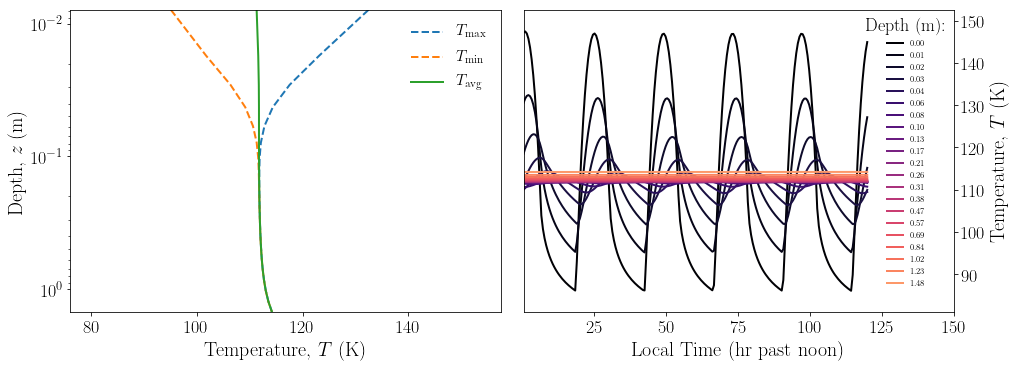

In [4]:
# Plot results
plt.figure()
fig, (ax1, ax2) = plt.subplots(figsize=[14,5], ncols=2)

# Depth profiles of min, mean, max temperature
ax1.set_xlim(-10+np.nanmin(m.T[:,0]),10+np.nanmax(m.T[:,0]))
ax1.set_yscale('log')
ax1.set_ylim(np.nanmax(m.profile.z),m.profile.z[1])
ax1.plot(np.nanmax(m.T,0), m.profile.z, ls='--', lw=2, label='$T_\mathrm{max}$')
ax1.plot(np.nanmin(m.T,0), m.profile.z, ls='--', lw=2, label='$T_\mathrm{min}$')
ax1.plot(np.nanmean(m.T,0), m.profile.z, lw=2, label='$T_\mathrm{avg}$')
ax1.set_xlabel('Temperature, $T$ (K)')
ax1.set_ylabel('Depth, $z$ (m)')
ax1.legend(frameon=False)
mpl.rcParams['font.size'] = 18

# Diurnal temperature curves
ax2.set_xlim(np.nanmin(m.lt), np.nanmax(m.lt)+30)
ax2.set_ylim(-5+np.nanmin(m.T[:,0]), np.nanmax(m.T[:,0])+5)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
i = 0
n = 1
zz = m.profile.z[0::n]
for z in zz:
    ax2.plot(m.lt, m.T[:,i], label='{:.2f}'.format(z), color=plt.cm.magma(i*10))
    i += n
ax2.legend(frameon=False, title='Depth (m):', fontsize=8)
ax2.set_xlabel('Local Time (hr past noon)')
ax2.set_ylabel('Temperature, $T$ (K)')